In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
vehicle_id = 3
data_root = './'  # 改成自己电脑上的路径即可
dataset = pd.read_csv(data_root + 'perfect_%d.csv' %vehicle_id)
header = dataset.columns.values.tolist()

### 特征选择

In [3]:
data_train = dataset.loc[range(int(0.75*len(dataset)))].copy()
data_test = dataset.loc[range(int(0.75*len(dataset)), len(dataset))].copy()
features = header[3:15]
label = header[15]
features, label, data_train.shape, data_test.shape

(['charge_duration',
  'mileage',
  'delta_mileage',
  'charge_start_soc',
  'charge_end_soc',
  'charge_delta_soc',
  'charge_start_U',
  'charge_end_U',
  'charge_start_I',
  'charge_end_I',
  'charge_max_temp',
  'charge_min_temp'],
 'charge_energy',
 (192, 16),
 (65, 16))

### 数据标准化

In [4]:
train_mean = data_train.mean()  
train_std = data_train.std()  
data_train_standard = (data_train - train_mean)/train_std #数据标准化
data_test_standard = (data_test - train_mean)/train_std
train_mean.to_csv("train_mean_%d.csv" % vehicle_id)
train_std.to_csv("train_std_%d.csv" % vehicle_id)
print(train_std, train_mean)

vehicle_id           0.000000e+00
charge_start_time    4.444406e+09
charge_end_time      4.436658e+09
charge_duration      3.683808e+03
mileage              4.843129e+03
delta_mileage        2.302893e+02
charge_start_soc     1.448423e+01
charge_end_soc       1.768810e+01
charge_delta_soc     1.043524e+01
charge_start_U       1.934309e+01
charge_end_U         8.641972e+00
charge_start_I       3.737139e+01
charge_end_I         2.463738e+01
charge_max_temp      5.607236e+00
charge_min_temp      3.695134e+00
charge_energy        5.982792e+00
dtype: float64 vehicle_id           3.000000e+00
charge_start_time    2.017638e+13
charge_end_time      2.017643e+13
charge_duration      4.247536e+03
mileage              1.482141e+05
delta_mileage        9.867188e+01
charge_start_soc     1.611458e+01
charge_end_soc       3.555313e+01
charge_delta_soc     1.943854e+01
charge_start_U       3.302193e+02
charge_end_U         3.683214e+02
charge_start_I      -4.312083e+01
charge_end_I        -2.465156e+01

### 将数据集分为训练集合测试集

In [5]:
X_train, y_train = data_train_standard[features].values, data_train_standard[label].values
X_test, y_test = data_test_standard[features].values, data_test_standard[label].values

### 评估模型

In [6]:
def evaluate(y_test, y_pred):
    #评估模型
    from sklearn import metrics
    # 用scikit-learn计算MSE
    print("MSE:",metrics.mean_squared_error(y_test, y_pred))
    # 用scikit-learn计算RMSE
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    # 用scikit-learn计算MAE
    print("MAE:",metrics.mean_absolute_error(y_test, y_pred))

    error_array = np.array(((y_test - y_pred) / y_test))
    error_rate = np.sqrt(np.sum(np.power(error_array,2)))
    print("error_rate: %f" % error_rate)

### 可视化

In [7]:
def visualize(y_test, y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([np.array(y_test).min(), np.array(y_test).max()], [np.array(y_pred).min(), np.array(y_pred).max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

### 随机森林树

| vehicle_id | MSE  |  RMSE  | MAE | ERROR_RATE |
|:-----:|:-----:|:----:|:-----:|:----:|
| 1 | 0.19938 | 0.44652 | 0.33928 | 19.29751 |
| 2 |0.356182| 0.596810| 0.324431|13.656586|
| 3 |0.055607|0.235811|0.150623|33.378313|
| 4 |0.010815| 0.103997|0.049774|22.391752|
| 5 |0.035053|0.187225|0.113038|9.759498|
|mean|0.157394|0.334888|0.221163|15.9176299|

MSE: 0.382686606062
RMSE: 0.618616687507
MAE: 0.418867056745
error_rate: 32.262746


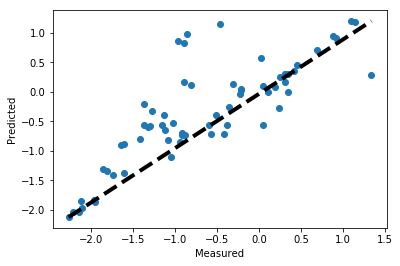

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### 极端森林树
| vehicle_id | MSE  |  RMSE  | MAE | ERROR_RATE |
|:-----:|:-----:|:----:|:-----:|:----:|
| 1 |0.139899|0.374030|0.236812|13.688066|
| 2 |0.346610|0.588736|0.319202| 7.907812|
| 3 |0.046969| 0.216722|0.117801|38.763150|
| 4 |0.005132|0.071640|0.039712|10.596218|
| 5 |0.041710|0.204231|0.096343|8.511466|
|mean|0.137303|0.329281|0.209067|14.038779|

MSE: 0.12935071489
RMSE: 0.359653604028
MAE: 0.26495731881
error_rate: 12.291484


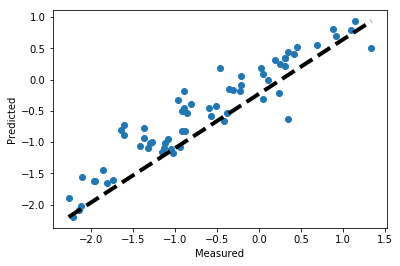

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred = etr.predict(X_test)


#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### 提升树
| vehicle_id | MSE  |  RMSE  | MAE | ERROR_RATE |
|:-----:|:-----:|:----:|:-----:|:----:|
|1|0.179231|0.423357|0.264233|20.098495|
|2|0.356205| 0.596830| 0.315227|7.464709|
|3|0.056956|0.238662| 0.134608|30.844308|
|4|0.011683|0.108088|0.053039|17.996962|
|5|0.049437|0.222345|0.112546|8.543136|
|mean|0.130814|0.317986|0.176591|16.994255|

MSE: 0.203929276971
RMSE: 0.45158529313
MAE: 0.296936614154
error_rate: 29.830838


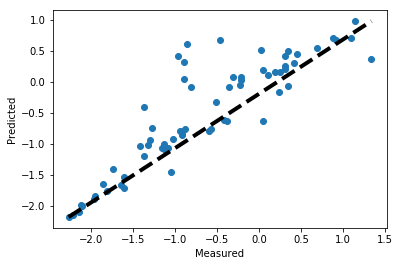

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### 回归树
| vehicle_id | MSE  |  RMSE  | MAE | ERROR_RATE |
|:-----:|:-----:|:----:|:-----:|:----:|
|1|0.184416|0.429436|0.276168|20.605115|
|2|0.353314| 0.594402| 0.319674|5.722045|
|3|0.071873| 0.268092|0.143248|44.064481|
|4|0.009642|0.098192|0.0479670|16.668128|
|5|0.050093|0.223814|0.136384|9.624120|
|mean|0.137821|0.328014|0.187750|18.952724|

MSE: 0.242562544985
RMSE: 0.492506390807
MAE: 0.317068308703
error_rate: 44.613633


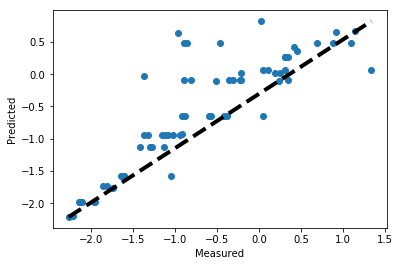

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### SVM，kernel=linear

Running time: 0.011449000000000265 Seconds
MSE: 0.53798466456
RMSE: 0.733474378939
MAE: 0.603312785475
error_rate: 18.386544


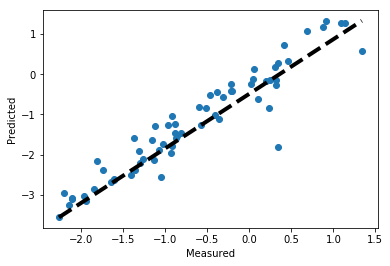

In [12]:
import time
from sklearn.svm import SVR
l_svr=SVR(kernel='linear')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))
#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### SVM，kernel='rbf'

Running time: 0.006251999999999924 Seconds
MSE: 0.495798294619
RMSE: 0.704129458707
MAE: 0.539243220604
error_rate: 28.586745


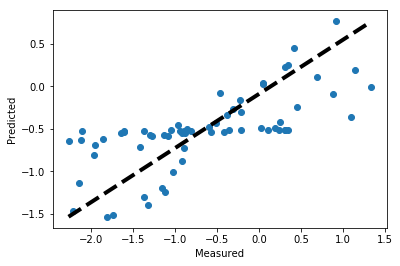

In [13]:
l_svr=SVR(kernel='rbf')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### SVM，kernel='poly'

Running time: 0.0080429999999998 Seconds
MSE: 19.9157968262
RMSE: 4.46271182424
MAE: 2.86342419589
error_rate: 140.070007


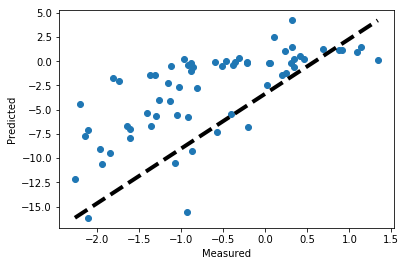

In [14]:
l_svr=SVR(kernel='poly')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)

### Linear SVR

Running time: 0.004705000000000403 Seconds
MSE: 0.555983687628
RMSE: 0.745643136915
MAE: 0.617008621878
error_rate: 29.157728


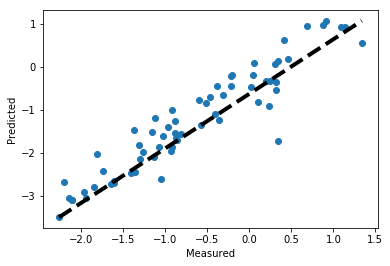

In [15]:
from sklearn import svm
l_svr=svm.LinearSVR(epsilon=0.1,loss='squared_epsilon_insensitive')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估模型
evaluate(y_test, y_pred)

#可视化
visualize(y_test, y_pred)